# Group 8

Vi Nguyen (13592629)

Bach Nguyen (14345755)

Ajwad Zaman (24687624)


## Solving a classification problem
In order to solve a classification problem, the following steps need to be taken:
##### Session 1: Introduction
- Find a suitable dataset -> Define the input dataset
- Explore the input dataset.
- Data Preprocessing (Problem 1)

##### Session 2: Training and testing data
- Form the training dataset and test dataset

##### Session 3: Classifier construction
- Develop a classifier by training a machine learning model using the training dataset
- Deploy the classifier to solve the target classification problem



(Problem 2: Session 4 - 7)
##### Session 4: Classifier evaluation
- Confusion Matrix
- Accuracy, recall, precision and F1 score

##### Session 5: Resampling
- Apply resampling technique SMOTE to improve the recall score of imbalance data set

##### Session 6: Hyperparameter tunning
- Use a grid search and ilterate through a set of parameters to find the best model that can improve the recall score
- Create the tune_model and train it
- Evaluate the model

##### Session 7: Evaluate the model on validating dataset
- Assess the model performance on unseen dataa


------------------------------------------------------------------------------------------------------------------------

Mount google drive and change the directory

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/Colab Notebooks/A2

/content/gdrive/MyDrive/Colab Notebooks/A2


------------------------------------------------------------------------------------------------------------------------

## Session 1: Introduction

In [ ]:
# Import pandas package
import pandas as pd

In [ ]:
# Load the dataset by reading the .csv file as a pandas dataframe
df = pd.read_csv('bank-full.csv',  sep=';')

Dataset explotary

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


Summary Statistics

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
# Count target variable
y_count = df['y'].value_counts()
print(y_count)

no     39922
yes     5289
Name: y, dtype: int64


In [ ]:
# count null value
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#check type
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Data preprocessing

In [ ]:
# import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
# Instantiate the encoder
le = LabelEncoder()

In [ ]:
# Convert categorical target values into numeric values using the encoder by fitting the encoder and transforming the target column

columns_to_encode = ['job', 'marital' ,'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y']

for columns in columns_to_encode:
  df[columns] = le.fit_transform(df[columns])

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [ ]:
df.dtypes

age          int64
job          int64
marital      int64
education    int64
default      int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
y            int64
dtype: object

--------------------------------------------------------------------------------------------------


## Session 2: Training and testing data
- Form the training dataset and test dataset


In [ ]:
# Import train_test_split from sklearn.model.selection
from sklearn.model_selection import train_test_split

In [ ]:
# Define the input features X as all columns except 'y' column and target variable  "y" column
X = df.drop('y', axis=1)
y = df['y']

In [ ]:
# Using train_test_split function to split the dataset into the training and test datasets, the percentage of samples in the test dataset is 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Get the last 4500 samples from the test to be the future data samples
futureSample_X = X_test[-4500:]
futureSample_y = y_test[-4500:]

# Remove the last 4500 samples from the test dataset
X_test = X_test[:-4500]
y_test = y_test[:-4500]

In [ ]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
38472,41,7,1,1,0,2399,1,0,0,15,8,303,2,351,2,0
12335,30,7,2,1,0,1881,0,1,2,26,6,29,1,-1,0,3
17145,45,9,2,1,0,586,0,1,0,28,5,32,3,-1,0,3
7636,48,0,0,1,0,132,1,0,2,30,8,171,1,-1,0,3
40769,30,4,1,2,0,805,0,0,0,10,1,134,3,194,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43416,30,4,1,2,0,102,1,0,0,5,0,470,7,426,3,1
3442,42,7,1,1,0,1048,1,0,2,15,8,51,1,-1,0,3
8021,41,1,1,0,0,143,1,1,2,2,6,659,2,-1,0,3
13674,44,2,1,2,0,0,1,0,2,9,5,300,1,-1,0,3


The dataset is separated into three parts with aprroximately
- Training: 31,500 rows
- Testing: 9,000 rows
- Validating: 4,500 rows

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Session 3: Classifier construction
- Develop a classifier by training a machine learning model using the training dataset
- Deploy the classifier to solve the target classification problem

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=3, max_depth=3, max_features=4, random_state=12)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=4, n_estimators=3,
                       random_state=12)

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred = model.predict(X_test)

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Now you can print or visualize the feature importances
print("Feature Importances:")
for feature, importance in zip(X_train.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
age: 0.038612318938304614
job: 0.004314753077368432
marital: 0.0012008234665373764
education: 0.0
default: 0.0
balance: 0.0008269884612532528
housing: 0.0
loan: 0.0
contact: 0.08135584962587636
day: 0.0
month: 0.18283667257737315
duration: 0.6197098509002398
campaign: 0.023096103363188597
pdays: 0.048046639589858504
previous: 0.0
poutcome: 0.0


------------------------------------------------------------------------------------------

##  Session 4: Classifier evaluation
- Confusion Matrix
- Accuracy, recall, precision and F1 score

In [ ]:
# Import required packages for evaluating a classification model using the test dataset
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Confusion Matrix

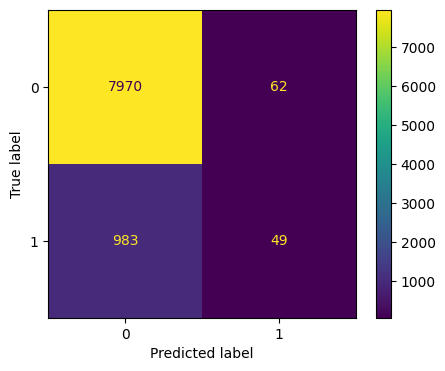

In [ ]:
# Display the confusion matrix using y_test and y_pred, the display lables are "0" and "1"
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1"])
cmp.plot(ax = ax);

Accuracy, recall, precision and F1 score


In [ ]:
# Calculate the accuracy of prediction of lables of test samples using the method accuracy_score()
accuracy_test = accuracy_score(y_test, y_pred)

report = metrics.classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy_test:.2f}")
print(report)

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      8032
           1       0.44      0.05      0.09      1032

    accuracy                           0.88      9064
   macro avg       0.67      0.52      0.51      9064
weighted avg       0.84      0.88      0.84      9064



In [ ]:
y_count = df['y'].value_counts()
print(y_count)

0    39922
1     5289
Name: y, dtype: int64


----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Session 5: Resampling
- Apply resampling technique SMOTE to improve the recall score of imbalance data set

I have learn this code from this website
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

Particularly, i have use this example part and modify it to get my code

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

# Apply SMOTE to the training data to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Create and fit a Random Forest classifier on the resampled data
rf_classifier_resampled = RandomForestClassifier()
rf_classifier_resampled.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [ ]:
# Make predictions on the test data using the resampled data
y_pred_resampled = rf_classifier_resampled.predict(X_test)

Accuracy, recall, precision and F1 score

In [ ]:
# Calculate the accuracy of prediction of lables of test samples using the method accuracy_score()
accuracy_test_resampled = accuracy_score(y_test, y_pred_resampled)
print(f"Accuracy: {accuracy_test_resampled:.2f}")


resampled_report = metrics.classification_report(y_test, y_pred_resampled)

# Evaluate the classifier's performance on the resampled data
print("SMOTE Data Classification Report:")
print(resampled_report)

Accuracy: 0.88
SMOTE Data Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      8032
           1       0.50      0.66      0.57      1032

    accuracy                           0.88      9064
   macro avg       0.72      0.79      0.75      9064
weighted avg       0.90      0.88      0.89      9064



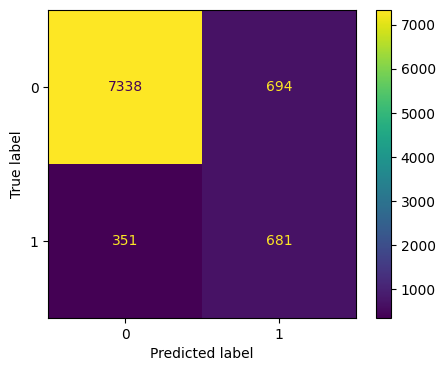

In [ ]:
# Display the confusion matrix using y_test and y_pred, the display lables are '0' and '1'
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test, y_pred_resampled)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1"])
cmp.plot(ax = ax);

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Session 6: Hyperparameter tunning
- Use a grid search and ilterate through a set of parameters to find the best model that can improve the recall score
- Create the tune_model and train it
- Evaluate the model

I have learn the hyperparameter grid search from this website
https://scikit-learn.org/stable/modules/grid_search.html

Specifically, I learn to
- define the hyperparameter grid in 3.2.1 Exhaustive Grid Search
- use the GridSearchCV in 3.2.4.3. Composite estimators and parameter spaces
- find the best hyperparameter using the best_param from 3.2.4.2. Specifying multiple metrics for evaluation¶


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10,20,50],  # Number of trees in the forest
    'max_depth': [5, 10, 20],     # Maximum depth of the trees
    'min_samples_split': [50, 100, 150],  # Minimum samples required to split an internal node
    'min_samples_leaf': [10, 20, 50, 100]    # Minimum samples required in a leaf node
}

# Perform grid search with cross-validation in random forest that already being resamppled
grid_search = GridSearchCV(estimator=rf_classifier_resampled, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_resampled, y_train_resampled)

# Optimal hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
# Apply the best hyperparameters to the mode
tune_model = RandomForestClassifier(max_depth = 20,
                                    min_samples_leaf = 10,
                                    min_samples_split = 50,
                                    n_estimators = 50,
                                    random_state=42)
tune_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=50,
                       n_estimators=50, random_state=42)

In [ ]:
# Predict the class labels of samples in the test dataset
tune_resampled_y_pred = tune_model.predict(X_test)

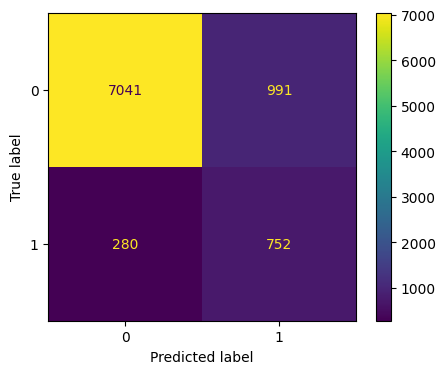

In [ ]:
# Display the confusion matrix using y_test and y_pred, the display lables are '0' and '1'
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(y_test, tune_resampled_y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1"])
cmp.plot(ax = ax);

Accuracy, recall, precision and F1 score

In [ ]:
# Calculate the accuracy of prediction of lables of test samples using the method accuracy_score()
accuracy_resampled_tuned = accuracy_score(y_test, tune_resampled_y_pred)
print(f"Accuracy: {accuracy_resampled_tuned:.2f}")

tune_report = metrics.classification_report(y_test,tune_resampled_y_pred)
print(tune_report)

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      8032
           1       0.43      0.73      0.54      1032

    accuracy                           0.86      9064
   macro avg       0.70      0.80      0.73      9064
weighted avg       0.90      0.86      0.87      9064



------------------------------------------------------------------------------------------------------------

## Session 7: Validating unseen dataset

In [ ]:
# Predicted class lables the samples in the futureSample dataset
y_pred_validate = tune_model.predict(futureSample_X)

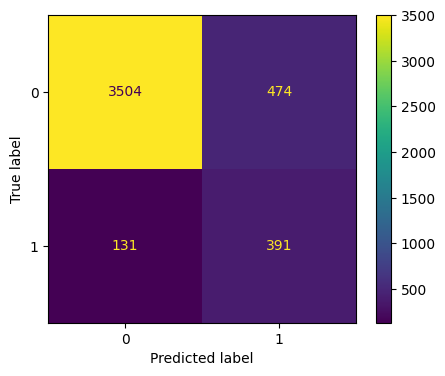

In [ ]:
# Display the confusion matrix using futureSample_y and y_pred_validate
fig,ax = plt.subplots(figsize=(5,4),dpi = 100)
cm = confusion_matrix(futureSample_y, y_pred_validate)
cmp = ConfusionMatrixDisplay(cm, display_labels = ["0", "1"])
cmp.plot(ax = ax);

Accuracy, recall, precision and F1 score

In [ ]:
# Evaluate the classifier's performance
valid_accuracy = accuracy_score(futureSample_y, y_pred_validate)
print(f"Accuracy: {valid_accuracy:.2f}")


valid_report = metrics.classification_report(futureSample_y, y_pred_validate)
print(valid_report)

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3978
           1       0.45      0.75      0.56       522

    accuracy                           0.87      4500
   macro avg       0.71      0.81      0.74      4500
weighted avg       0.90      0.87      0.88      4500

